In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation

'/Users/davidalexanderbehrens/Documents/Master Thesis Code/repeated_chirp.gif'

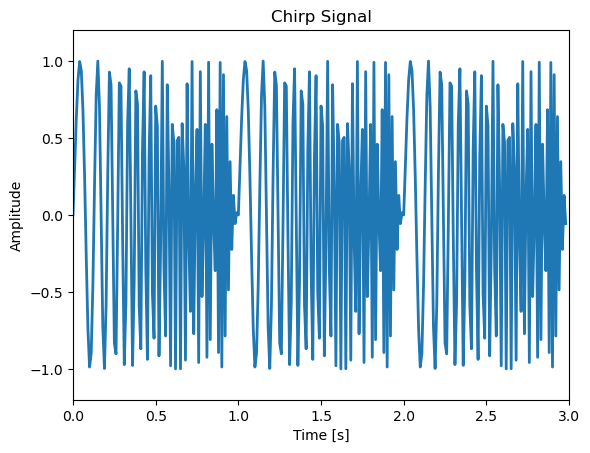

In [3]:
# Parameter: niedrigere Frequenzen für bessere Sichtbarkeit
fs = 1000
T_chirp = 1
f0, f1 = 5, 50  # Start- und Endfrequenz reduziert
n_repeats = 3


t_chirp = np.linspace(0, T_chirp, int(fs * T_chirp), endpoint=False)
chirp = np.sin(2 * np.pi * (f0 * t_chirp + 0.5 * (f1 - f0) / T_chirp * t_chirp**2))

# Gesamtzeitachse & wiederholtes Signal
signal = np.tile(chirp, n_repeats)
t_total = np.linspace(0, T_chirp * n_repeats, len(signal), endpoint=False)

# Frame-Auswahl für Animation
frame_step = 10
t_anim = t_total[::frame_step]
signal_anim = signal[::frame_step]

# Setup Plot
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.set_xlim(0, T_chirp * n_repeats)
ax.set_ylim(-1.2, 1.2)
ax.set_title("Chirp Signal")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Amplitude")

# Initialisierung
def init():
    line.set_data([], [])
    return line,

# Animationsfunktion
def animate(i):
    line.set_data(t_anim[:i], signal_anim[:i])
    return line,

# Animation erstellen
ani = animation.FuncAnimation(fig, animate, init_func=init,
                              frames=len(t_anim), interval=20, blit=True)

gif_path = "/Users/davidalexanderbehrens/Documents/Master Thesis Code/repeated_chirp.gif"
ani.save(gif_path, writer="pillow", fps=30)

gif_path